In [1]:
import numpy as np
from scipy import integrate
from matplotlib.pylab import *
import pandas as pd
# from sklearn import preprocessing

source https://learnche.org/3E4/Assignment_6_-_2010_-_Solutions

# Model definition

In [37]:
def dy_dt(t, y):
    """ 
    y1 = dN/dt
    y2 = dB/dt
    
    INPUTS:    
        t: time 
        y: the time varying concentrations: N and B
    """
    
    V = 1600.0   # m^3    
    
    mu_max = 5.0 # 1/day
    K = 20.0     #g/m^3
#     Y_B = 0.8    # effiency
    F = 5000.0   # m^3/day
    F = 5000 + 900*sin(2*np.pi/24*t -np.pi/5) # m^3/day
    
    N_in = 150.
#     # Change these time values, depending on the question
#     if t >= 75 and t <= 85:
#         N_in = 150.0
#     else:
#         N_in = 100.0 # g/m^3
            
    N = y[0]
    B = y[1]
    y = np.zeros((2,1))
    y[0] = F/V*(N_in - N) - (1/Y_B)*(mu_max*N/(K+N)) * B
    y[1] = -B*F/V + (mu_max*N/(K+N)) * B 
    return(y)

In [50]:
Y_B = 0.5

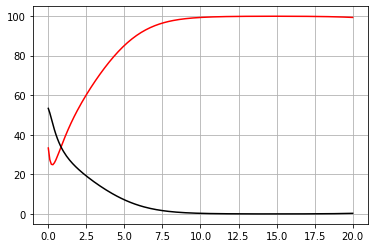

In [98]:
r = integrate.ode(dy_dt).set_integrator('vode', method='bdf')

# Part 2: steady-state
ICs = [33.33333333333,  53.3333333333]
t_0 = 0.0
r.set_initial_value(ICs, t_0)
t_final = 20
dt = 0.1

# Create vectors to store the solutions 
n_steps = np.floor((t_final - t_0)/dt) + 1
time = np.zeros(int(n_steps))
N = np.zeros(int(n_steps))
B = np.zeros(int(n_steps))
N[0], B[0] = ICs
k = 1

while r.successful() and r.t < t_final:
    r.integrate(r.t + dt)
    time[k] = r.t

    N[k] = r.y[0]
    B[k] = r.y[1]
    k += 1

# Clear figure window from previous simulation
clf()
plot(time, N, 'r', label='Nutrient level')
plot(time, B, 'k', label='Biomass level')
# legend(loc='best')
grid('on')

<div class="alert alert-success">
    <b>EXERCISE</b>: how can I run the model with different values of Y_B? Make Y_B modifiable
</div>

# Model calibration

In [65]:
# let's give Y_B different values
# parset = [0.2, 0.25, 0.8, 0.9, 0.3]
parset = np.random.rand(5)

In [66]:
def biomodel():
    
    r = integrate.ode(dy_dt).set_integrator('vode', method='bdf')

    # Part 2: steady-state
    ICs = [33.33333333333,  53.3333333333]
    t_0 = 0.0
    r.set_initial_value(ICs, t_0)
    t_final = 20
    dt = 0.1


    # Create vectors to store the solutions 
    n_steps = np.floor((t_final - t_0)/dt) + 1
    time = np.zeros(int(n_steps))
    N = np.zeros(int(n_steps))
    B = np.zeros(int(n_steps))
    N[0], B[0] = ICs
    k = 1

    while r.successful() and r.t < t_final:
        r.integrate(r.t + dt)
        time[k] = r.t

        N[k] = r.y[0]
        B[k] = r.y[1]
        k += 1

    # Clear figure window from previous simulation
#     clf()
    plot(time, N, 'r', label='Nutrient level')
    plot(time, B, 'k', label='Biomass level')
    legend(loc='best')
    grid('on')
    
    return(N)

In [67]:
for i in parset:
    print(i)

0.3804296598786788
0.22100947894551115
0.8918655016442738
0.5246964350905858
0.4386942225027337


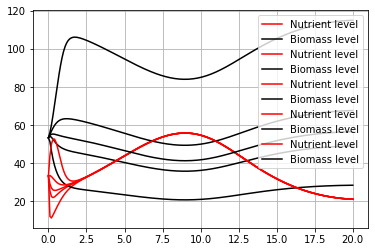

In [68]:
pos = 1
N_mod = pd.DataFrame()

for i in parset:
    Y_B = i
    N_mod[pos] = biomodel()
    pos = pos+1

In [62]:
N_mod

,1,2,3,4,5
0,33.333333,33.333333,33.333333,33.333333,33.333333
1,10.324733,14.756382,42.272933,44.265920,19.217180
2,10.207822,13.059602,46.874778,50.328412,16.427217
3,11.742341,14.277011,48.469857,52.932352,16.984235
4,13.409230,15.840393,47.980994,53.037338,18.231626
...,...,...,...,...,...
196,21.314481,21.314505,21.314501,21.314506,21.314517
197,21.256666,21.256690,21.256695,21.256695,21.256709
198,21.205493,21.205527,21.205528,21.205521,21.205545
199,21.160947,21.160977,21.160980,21.160969,21.160985


<div class="alert alert-success">
    <b>EXERCISE</b>: randomly sample Y_B
</div>

In [64]:
np.random.rand(5)

array([0.27201707, 0.76851395, 0.20448083, 0.17912854, 0.33914117])

## measured values

In [69]:
N_meas = 30 + 10*sin(2*np.pi/24*np.arange(0, t_final+dt, dt) -np.pi/5)

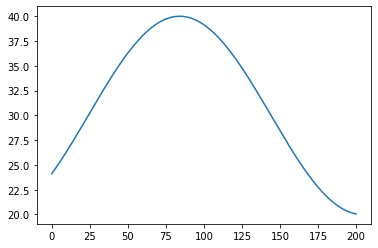

In [70]:
plt.plot(N_meas);

## compare measured and modeled values 

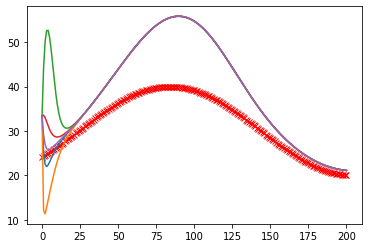

In [71]:
fig, ax = plt.subplots()
ax.plot(N_meas, 'rx')
ax.plot(N_mod);

In [76]:
N_mod[1]

0      33.333333
1      25.477386
2      22.543984
3      21.995194
4      22.371722
         ...    
196    21.314517
197    21.256706
198    21.205532
199    21.160967
200    21.123004
Name: 1, Length: 201, dtype: float64

In [78]:
N_mod.shape

(201, 5)

In [77]:
N_meas.shape

(201,)

In [79]:
residuals = N_mod[1] - N_meas

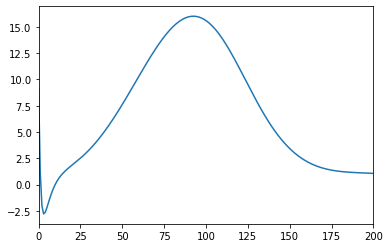

In [80]:
residuals.plot()

In [81]:
np.mean([np.abs(residuals)]) # MAE mean absolute error

6.899572073659871

In [82]:
np.mean([np.sqrt(residuals**2)]) ### RMSE (root mean sq error)

6.899572073659871

In [83]:
np.mean([(residuals**2)]) # MSE (mean sq error) range: [0, inf] optimum: 0

76.23599797229966

## multi-parameter estimation

### define parameter space and values

In [84]:
from SALib.sample import saltelli, latin
import seaborn as sns

In [94]:
## here we define the domain of each parameter we want to vary
problem = {
  'num_vars': 3,
  'names': ['Y_B', 'K', 'mu_max'],
  'bounds': [[0.1, 0.99], [10, 30], [1, 7]]}

# Generate samples
param_values = latin.sample(problem, 100) #calc_second_order=False)
param_values = pd.DataFrame(param_values, columns=problem['names']) 

In [95]:
param_values.head()

,Y_B,K,mu_max
0,0.210454,15.660133,1.381216
1,0.441200,23.756677,5.209030
2,0.120260,27.022075,6.448274
3,0.134187,14.081183,6.201536
4,0.687593,22.336022,5.780672


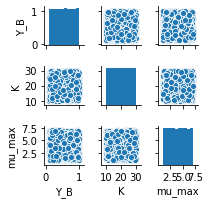

In [87]:
sns.pairplot(param_values[problem['names']], height=1); # plotting only the sampled ones

### re-define model undefining the target parameters

In [96]:
def dy_dt(t, y):
    """ 
    y1 = dN/dt
    y2 = dB/dt
    
    INPUTS:    
        t: time 
        y: the time varying concentrations: N and B
    """
    
    V = 1600.0   # m^3    
    
    F = 5000 + 900*sin(2*np.pi/24*t -np.pi/5) # m^3/day
    
    # Change these time values, depending on the question
    if t >= 75 and t <= 85:
        N_in = 150.0
    else:
        N_in = 100.0 # g/m^3
            
    N = y[0]
    B = y[1]
    y = np.zeros((2,1))
    y[0] = F/V*(N_in - N) - (1/Y_B)*(mu_max*N/(K+N)) * B
    y[1] = -B*F/V + (mu_max*N/(K+N)) * B 
    return(y)

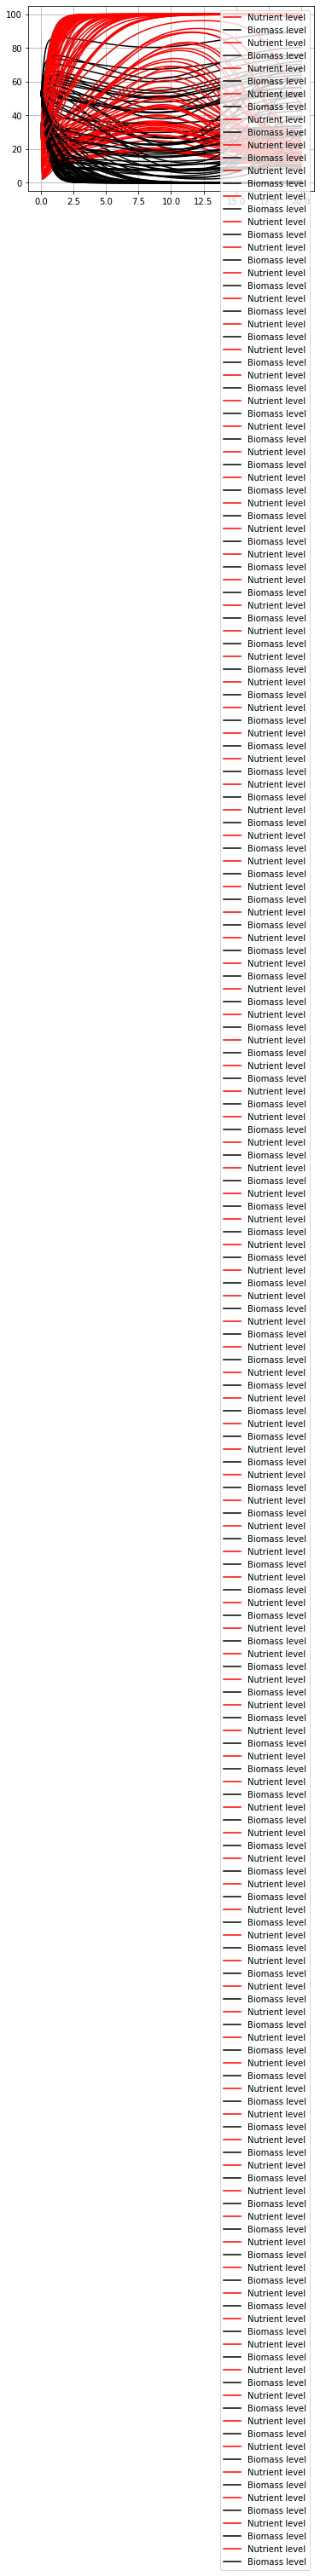

In [99]:
N_mod = pd.DataFrame()

for row in param_values.index:
    Y_B = param_values['Y_B'][row]
    K = param_values['K'][row]
    mu_max = param_values['mu_max'][row]
    
    N_mod[row] = biomodel()

In [100]:
N_mod

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,...,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333
1,31.055367,21.028472,3.268582,2.017276,26.706778,21.375728,25.029951,24.996332,22.503181,18.817801,...,40.514951,43.116527,38.091839,30.543774,40.611985,35.650759,43.818041,34.952123,31.314300,27.419960
2,32.613745,17.133683,4.056596,2.519001,22.907607,19.305325,21.542614,23.694775,17.370501,12.257312,...,46.866962,51.101489,42.215564,30.351226,46.499756,38.809367,52.343575,36.998092,31.017552,25.118160
3,36.160680,16.845684,5.000250,3.105937,21.088225,20.840254,20.648127,25.476485,15.675891,10.726633,...,52.582662,57.748389,45.893430,31.598373,51.431534,42.436678,59.426826,39.255125,31.673658,24.921136
4,40.745498,17.750777,6.077613,3.774477,20.414839,23.706732,20.913662,28.642027,15.391664,10.792292,...,57.757897,63.352683,49.231165,33.627136,55.662222,46.294097,65.383580,41.597799,32.833798,25.853867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,100.000000,23.388449,18.021834,10.013300,18.009949,99.999999,22.779022,100.000000,14.361238,10.825429,...,100.000000,100.000000,99.999911,99.999598,99.999999,100.000000,100.000000,99.989052,51.001955,99.380344
197,100.000000,23.320154,17.982030,9.992332,17.966231,99.999999,22.717321,100.000000,14.332303,10.799918,...,100.000000,100.000000,99.999911,99.999595,99.999999,100.000000,100.000000,99.988730,49.795577,99.349595
198,100.000000,23.258944,17.946706,9.973913,17.927395,99.999999,22.662118,100.000000,14.306764,10.777466,...,100.000000,100.000000,99.999911,99.999592,99.999999,100.000000,100.000000,99.988421,48.669121,99.317147
199,100.000000,23.204782,17.915858,9.958043,17.893439,99.999999,22.613389,100.000000,14.284619,10.758069,...,100.000000,100.000000,99.999911,99.999589,99.999999,100.000000,100.000000,99.988106,47.625848,99.282923


### multi-parametric and multi-metric model evaluation

In [101]:
def calc_metrics3(modelled, observed):
    """
    Calucates metrics of comparison between modelled and observed variables
    
    -------
    Prameters
    
    modelled: array of floats or time serie
    observed: array of floats or time serie
    """
    
    residuals = np.abs(modelled - observed)
    df = pd.DataFrame({'MAE': np.mean([np.abs(residuals)]), ### MAE (mean absolute error) range: [0, inf] optimum: 0
                      'RMSE': np.mean([np.sqrt(residuals**2)]), ### RMSE (root mean sq error)
                      'MSE': np.mean([(residuals**2)]), ### MSE (mean sq error) range: [0, inf] optimum: 0
#                       'RRMSE': np.mean([np.sqrt((residuals**2))])/np.mean(observed), ### RRMSE (relative root mean sq error)
#                       'SSE': np.sum(residuals**2), ### SSE (sum of sq errors) range: [0, inf] optimum: 0
#                       'AMRE': np.mean([np.abs(residuals/observed)]), ### AMRE (abs mean relative error [from MREin pystran]) range: [-inf, inf] optimum: 0
#                       'MARE': np.mean([(np.abs(residuals)/observed)]), ### MARE (mean abs relative error) range: [0, inf] optimum: 0
#                       'SARE': (np.abs(residuals)/observed).sum(axis=0), ### SARE (sum of abs relative error) range: [0, inf] optimum: 0
#                       'MeAPE': np.median([(np.abs(residuals)*100./observed)]), ### MeAPE (median of absolute prediction error) range: [0, inf] optimum: 0
#                       'MSRE': np.mean([((residuals/observed)**2)]), ### MSRE (mean sq relative error) range: [0, inf] optimum: 0
                      'RVE': np.sum([residuals])/np.sum([observed])}, ### RVE (relative vol error) range: [-inf, inf] optimum: 0
                      index=[0])
    return df

In [103]:
calc_metrics3(N_mod[0], N_meas)

,MAE,RMSE,MSE,RVE
0,64.596638,64.596638,4328.42409,2.037967


<div class="alert alert-success">
    <b>EXERCISE</b>: run the cell below, why doesn't work?! fix it
</div>

In [105]:
scores_martix = pd.DataFrame()

for scenario in N_mod:
    a = calc_metrics3(N_mod[scenario], N_meas)
    a.index = [scenario]
    scores_martix = pd.concat([scores_martix, a], axis=0, ignore_index=False)

In [106]:
scores_martix

,MAE,RMSE,MSE,RVE
0,64.596638,64.596638,4328.424090,2.037967
1,8.853109,8.853109,104.327055,0.279308
2,4.913518,4.913518,34.157870,0.155017
3,16.456307,16.456307,280.171457,0.519182
4,2.637184,2.637184,8.602315,0.083201
...,...,...,...,...
95,64.260563,64.260563,4273.972010,2.027364
96,66.089771,66.089771,4456.201140,2.085074
97,60.863034,60.863034,3922.276658,1.920175
98,46.862295,46.862295,2449.648602,1.478464


## put order into all these metrics' numbers

In [108]:
from sklearn import preprocessing

In [109]:
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = pd.DataFrame(min_max_scaler.fit_transform(scores_martix), columns=scores_martix.columns)
x_scaled['sum'] = x_scaled.sum(axis=1)
x_scaled['scenario'] = scores_martix.index
x_scaled = x_scaled.set_index(x_scaled['sum'], drop=False).sort_index()

In [110]:
x_scaled

,MAE,RMSE,MSE,RVE,sum,scenario
sum,,,,,,
0.000459,0.000000,0.000000,0.000459,0.000000,0.000459,81
0.007530,0.002288,0.002288,0.000667,0.002288,0.007530,24
0.010721,0.003574,0.003574,0.000000,0.003574,0.010721,4
0.032465,0.010378,0.010378,0.001331,0.010378,0.032465,84
0.044446,0.014547,0.014547,0.000807,0.014547,0.044446,26
...,...,...,...,...,...,...
3.971644,0.993853,0.993853,0.990086,0.993853,3.971644,96
3.974132,0.994229,0.994229,0.991446,0.994229,3.974132,52
3.987646,0.997349,0.997349,0.995598,0.997349,3.987646,19


### visualization!

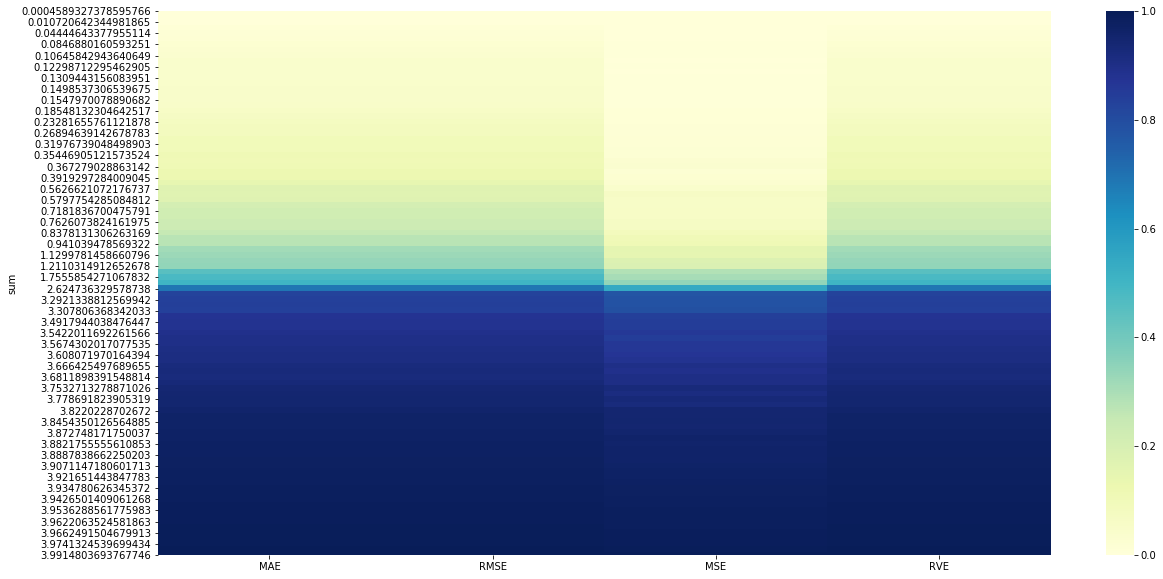

In [111]:
fig, ax1 = plt.subplots(figsize=(20, 10))
sns.heatmap(x_scaled.drop(['scenario', 'sum'], axis=1)[:100], # plotting only the 12 metrics and the best 50 scenarios
            ax=ax1, annot=False, cmap="YlGnBu");

### the top 10 scenarios

In [112]:
x_scaled['scenario'].head(10)

sum
0.000459    81
0.007530    24
0.010721     4
0.032465    84
0.044446    26
0.059118    63
0.084688    73
0.092508    60
0.106458    28
0.122815    48
Name: scenario, dtype: int64

In [113]:
param_values.iloc[x_scaled['scenario'].head(10)]

,Y_B,K,mu_max
81,0.346136,27.553468,5.962766
24,0.407730,25.296250,5.735513
4,0.687593,22.336022,5.780672
84,0.411959,18.222917,5.147462
26,0.863348,29.873465,6.692796
63,0.250962,17.813347,5.315514
73,0.763002,16.617438,4.883246
60,0.274982,13.604713,4.795881
28,0.262777,14.284680,4.988495
48,0.812912,27.316232,6.592224


<div class="alert alert-success">
    <b>EXERCISE</b>: Plot the best modeled results with the measured data
</div>

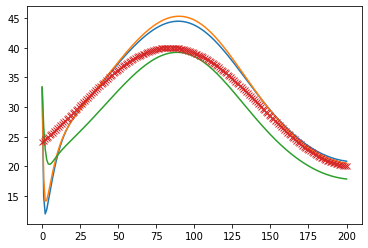

In [117]:
fig, ax = plt.subplots()
ax.plot(N_mod[x_scaled['scenario'].head(3)])
ax.plot(N_meas, 'x')

### How do my parameters distribute?

In [115]:
threshold = 10
good = param_values[problem['names']].loc[x_scaled['scenario'].head(threshold).values[:]]
bad = param_values[problem['names']].loc[x_scaled['scenario'].tail(threshold*2).values[:]]
good['color'] = 'good'
bad['color'] = 'bad'
good_bad_nh = pd.concat([good, bad])

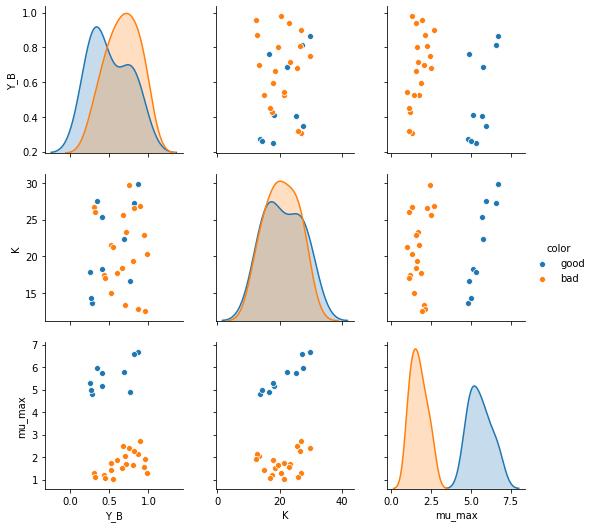

In [116]:
sns.pairplot(good_bad_nh, hue='color');